In [1]:
import matplotlib.patches as mp
import matplotlib.pyplot as pp
import matplotlib.transforms as mpt

%matplotlib inline

In [2]:
true_ls = ["rotate-outward", "ok", "zoom-in", "swipe-left", "swipe-down", "zoom-out", "beckoning", "push-hand-right", "swipe-right", "push-hand-down", "push-hand-up", "thumbs-up", "swipe-up", "tap-index", "finger-snap"]
pred_ls = ["finger-snap", "ok", "zoom-in", "swipe-left", "swipe-down", "zoom-in", "zoom-out", "beckoning", "push-hand-right", "swipe-right", "push-hand-down", "push-hand-up", "thumbs-up", "swipe-up", "tap-index", "tap-index"]

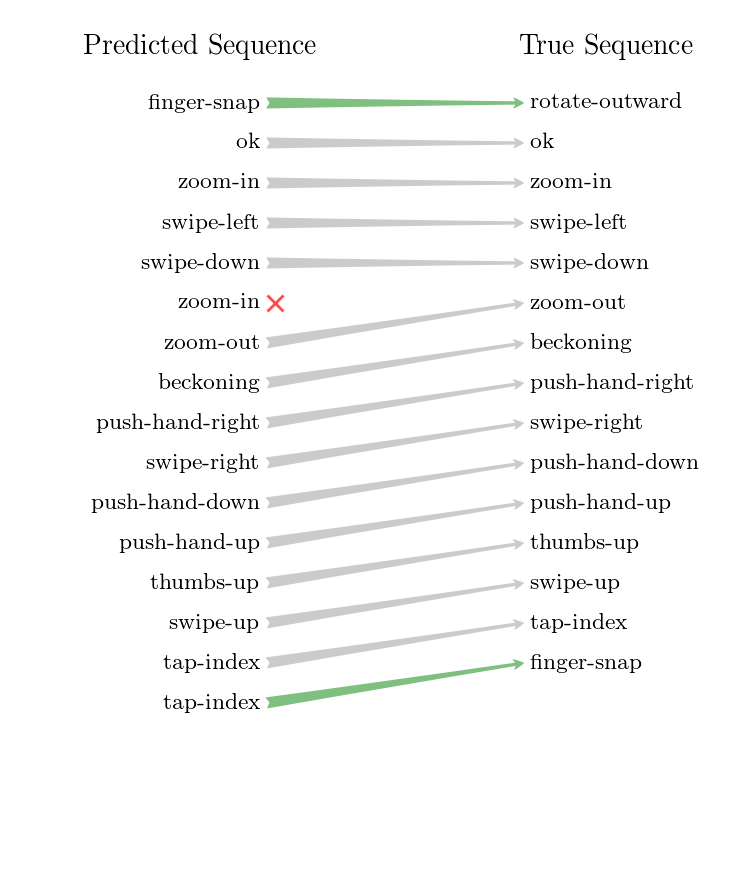

In [3]:
fig = pp.figure(figsize=(3, 4), dpi=200)
ax = fig.add_axes([0, 0, 1, 1])
ax.axis("off")

# Titles
ax.annotate("Predicted Sequence", xy=(0.15, 0.97), xycoords=fig.transFigure, ha="center", va="center")
ax.annotate("True Sequence", xy=(0.83, 0.97), xycoords=fig.transFigure, ha="center", va="center")

for i, l in enumerate(pred_ls):
    ax.annotate(l, xy=(0.25, 0.95 - (i + 1) * 0.05), xycoords=fig.transFigure, ha="right", va="center", size=8)

for i, l in enumerate(true_ls):
    ax.annotate(l, xy=(0.7, 0.95 - (i + 1) * 0.05), xycoords=fig.transFigure, ha="left", va="center", size=8)
    
correspondence = [(i, i) for i in range(5)] + [(i, i - 1) for i in range(6, 16)]
for a, b in correspondence:
    if pred_ls[a] == true_ls[b]:
        color = "0.6"
    else:
        color = "g"
        
    arrow = mp.FancyArrowPatch(posA=(0.26, 0.95 - (a + 1) * 0.05), posB=(0.69, 0.95 - (b + 1) * 0.05),
                               arrowstyle="fancy", fc=color, ec="none", alpha=0.5,
                               shrinkA=0, shrinkB=0,
                               mutation_scale=10, transform=fig.transFigure)
    
    ax.add_patch(arrow)
    
# Mark label for removal
pp.plot(0.275, 0.65, marker="x", c="r", alpha=0.7, transform=fig.transFigure)

In [4]:
fig.savefig("../doc/figures/results/levenshtein.pdf", bbox_inches=mpt.Bbox.from_bounds(-0.25, 0.5, 3.25, 3.5))